In [1]:
"""
auteur:Alexandre
date:2024/09/03

Reproduction du modèle utilisé pour les élections présidentielles
"""

'\nauteur:Alexandre\ndate:2024/09/03\n\nReproduction du modèle utilisé pour les élections présidentielles\n'

# **Modèle de Transfert de Voix**

## Chargement des données

In [2]:
import pandas as pd
import params as prm
import numpy as np
import fitting_model as ft
import os

In [3]:
df_1f = pd.read_csv(os.path.join(prm.datasets_path, f"DF_{prm.dataset_1er_tour}.csv"))
df_2f = pd.read_csv(os.path.join(prm.datasets_path, f"DF_{prm.dataset_2nd_tour}.csv"))
print(df_1f.shape, df_2f.shape)

(61593, 23) (61593, 18)


## Entrainement du modèle

In [20]:
batch_size = 2**5
num_epochs = 300
lr = 1e-5

In [21]:
trans, losses_train, losses_test, pred, test = ft.fit_data(
    df_1f=df_1f,
    df_2f=df_2f,
    batch_size=batch_size,
    num_epochs=num_epochs,
    device="cpu",
    lr=lr
)

Il semble y avoir 16 coeurs dans cet ordi !


Computing on cpu: 100%|██████████| 300/300 [12:33<00:00,  2.51s/it]


In [29]:
# Path pour l'enregistrement des données
results_path = os.path.join(prm.cwd, "results")
result_path = os.path.join(results_path,f"{len(os.listdir(results_path))}")

# Enregistrement des données
if not(os.path.exists(result_path)):
    os.mkdir(result_path)
np.save(os.path.join(result_path, "loss_train"), losses_train)
np.save(os.path.join(result_path, "loss_test"), losses_test)
np.save(os.path.join(result_path, "pred"), pred)
np.save(os.path.join(result_path, "test"), test)

# Enregistrement des paramètres de l'entrainement
fichier = open(os.path.join(result_path, "info.txt"), "w")
fichier.write(f"{num_epochs = }\n")
fichier.write(f"{batch_size = }\n")
fichier.write(f"{lr = }")
fichier.close()

## Représentation des résultats

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch

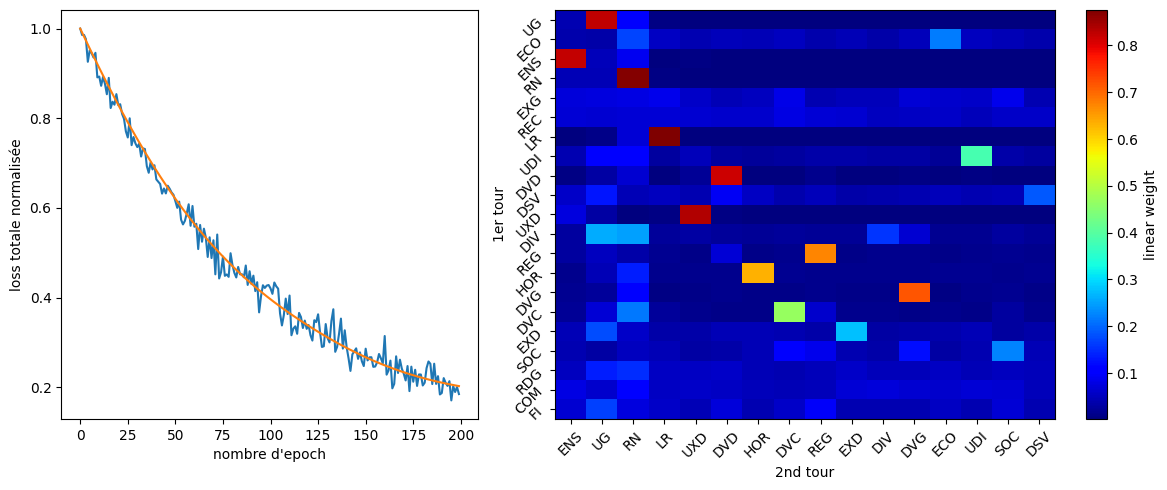

In [17]:
fig,ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(12,5),
    gridspec_kw={"width_ratios":[0.4,0.6]},
    dpi=100
)

ax[0].plot(
    range(num_epochs),
    losses_train / losses_train.max()
)
ax[0].plot(
    range(num_epochs),
    losses_test / losses_test.max()
)
ax[0].set_xlabel("nombre d'epoch")
ax[0].set_ylabel("loss totale normalisée")

m1 = ax[1].imshow(
    # trans.lin.weight.cpu().detach().numpy(),
    torch.softmax(trans.lin.weight, axis=1).cpu().detach().numpy(),
    cmap="jet", aspect="auto",
    # vmin=-6, vmax=+6
)
cbar = fig.colorbar(m1, ax=ax[1])
cbar.set_label("linear weight")
ax[1].set_xticks(
    range(df_2f.keys()[:-2].shape[-1]),
    df_2f.keys()[:-2],
    rotation=45
)
ax[1].set_yticks(
    range(df_1f.keys()[:-2].shape[-1]),
    df_1f.keys()[:-2],
    rotation=45
)
ax[1].set_xlabel("2nd tour")
ax[1].set_ylabel("1er tour")

plt.tight_layout()
plt.show()

In [18]:
report_norm = (torch.softmax(trans.lin.weight, axis=1).cpu().detach().numpy() / torch.softmax(trans.lin.weight, axis=1).cpu().detach().numpy().max(axis=0))
cmap = prm.cm.tab20

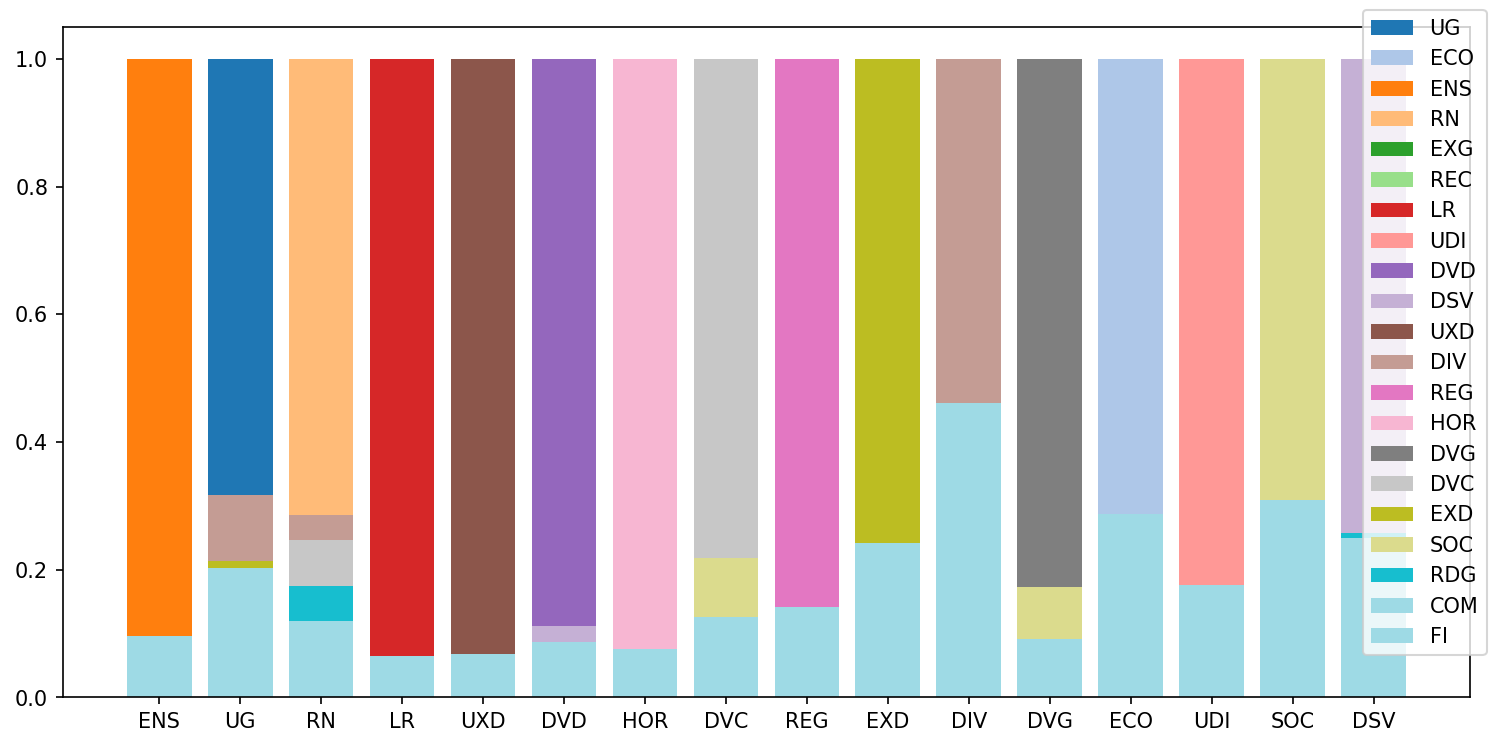

In [19]:
fig,ax = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(10,5),
    dpi=150
)

for i in range(df_1f.shape[-1]-2):
    
    b = ax.bar(
        df_2f.keys()[:-2],
        height=report_norm[i,:],
        label=df_1f.keys()[i],
        color=cmap(i)
    )

fig.legend()
plt.tight_layout()
plt.show()

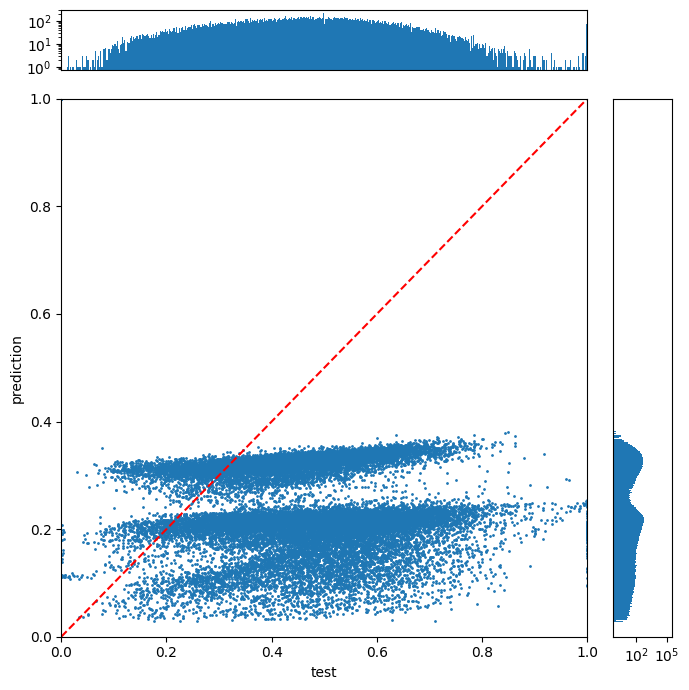

In [12]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(7,7),
    dpi=100,
    gridspec_kw={
        "height_ratios":[0.1,0.9],
        "width_ratios":[0.9,0.1]
                 }
)

values_test, bins_test = np.histogram(test, bins=np.linspace(0.01, test.max(), 500))
ax[0,0].bar(
    x=bins_test[:-1],
    height=values_test,
    width=bins_test[1]-bins_test[0]
)
ax[0,0].set_xticks([])
ax[0,0].set_yscale("log")

ax[1,0].scatter(
    x=test.reshape(test.shape[0]*test.shape[-1]),
    y=pred.reshape(pred.shape[0]*pred.shape[-1]),
    s=1
)
ax[1,0].plot(
    [0,1],
    [0,1],
    linestyle="dashed",
    color="red"
)
ax[1,0].set_xlabel("test")
ax[1,0].set_ylabel("prediction")

values_pred, bins_pred = np.histogram(pred, bins=np.linspace(pred.min(), pred.max(), 500))
ax[1,1].barh(
    bins_pred[:-1],
    values_pred,
    height=bins_test[1]-bins_test[0]
)
ax[1,1].set_yticks([])
ax[1,1].set_xscale("log")

ax[0,1].set_axis_off()

ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(0,1)
ax[0,0].set_xlim(0,1)
ax[1,1].set_ylim(0,1)
plt.tight_layout()
plt.show()

In [160]:
prm.WaTer()

Last updated: 2024-09-04T19:00:32.380603+02:00

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.24.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 116 Stepping 1, AuthenticAMD
CPU cores   : 16
Architecture: 64bit

